# Fitting IV data using Shockley's Diode Equation

We have seen how we can calculate the radiative limits to solar cell efficiency.  Let us now tackle the problem from the opposite direction and fit data to an empirical 2-diode model:

$J = J_{\mathrm{ph}}-J_{01}\left[\exp \left\{q\left(V+J R_s\right) / n_1 k T\right\}-1\right] -J_{02}\left[\exp \left\{q\left(V+J R_s\right) / n_2 k T\right\}-1\right]-\left(V+J R_s\right) / R_{\mathrm{sh}}$

Where $J_{01}$ is the diode saturation current with ideality $n_1$, $J_{02}$ is the diode satudation current with ideality $n_2$, $R_s$ is the lumped series resistance and $R_{sh}$ is the shunt resistance. 

The diode ideality factors are sometimes used as free parameters when fitting IV data.  Here we choose to assign specific values so provide physical meaning to the $J_0$ values.  Setting $n_1=1$ means $J_01$ accounts for all radiative processes throughout the device and non-radiative processes in the neutral regions of the device, including surface recombination.  Setting $n_2=2$ approximates Shockley-Read-Hall recombination in the space-charge-region of the junction where the electron and hole carrier densities are similar. 

## Fitting IV data

Imagine you have measured some dark IV data and light IV data and wish to analyse it.  Here we take data from this publication [Tobin, SP, Vernon, SM, Bajgar, C, Wojtczuk, SJ, Melloch, MR, Keshavarzi, A, Stellwag, TB, Venkatensan, S, Lundstrom, MS, & Emery, KA. ’Assessment of MOCVD-grown and MBE-Grown GaAs for High-Efficiency Solar-Cell Applications’. IEEE Transactions on Electron Devices, 37(2) (1990) 469](https://doi.org/10.1109/16.46385)  

First let's plot the data reported by Tobin et al., for sample 1552-3-5

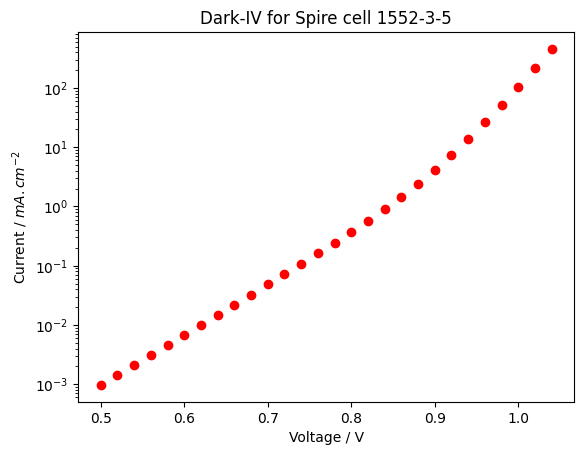

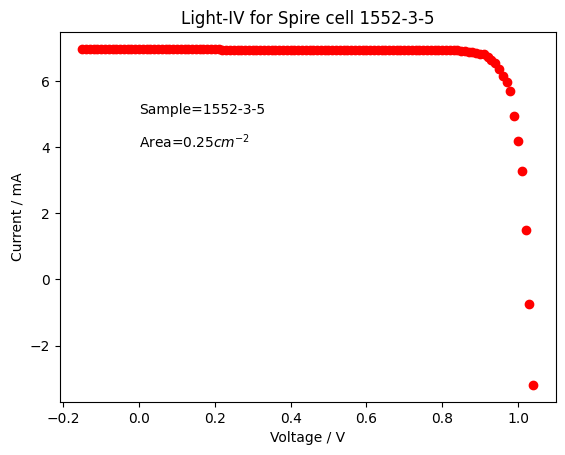

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def this_dir_file(f):
    file_path = Path.cwd()
    return file_path / "data" /  f

# Load the light-IV data
livData = np.loadtxt(this_dir_file("gaas_lightiv.csv"), unpack=True, delimiter=",")
# Load the dark-IV data
divData = np.loadtxt(this_dir_file("gaas_darkiv.csv"), unpack=True, delimiter=",")

plt.figure(1)
plt.semilogy(divData[0],divData[1],'o',color="red", label='Data')
plt.title('Dark-IV for Spire cell 1552-3-5')
plt.xlabel('Voltage / V')
plt.ylabel('Current / $mA.cm^{-2}$')
plt.show()

plt.figure(2)
plt.plot(livData[0],livData[1],'o',color="red")
plt.title('Light-IV for Spire cell 1552-3-5')
plt.xlabel('Voltage / V')
plt.ylabel('Current / mA')
plt.text(-0,5,'Sample=1552-3-5')
plt.text(-0,4,'Area=$0.25cm^{-2}$')
plt.show()

Second, let us fit the dark current for the solar cell.  To do this weconstruct a 2-diode (2D) model for this cell using the 2D junction model.

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


/Users/z3533914/.pyenv/versions/3.11.5/lib/python3.11/site-packages/solcore/registries.py:73: UserWarning: Optics solver 'RCWA' will not be available. An installation of S4 has not been found.
  warn(


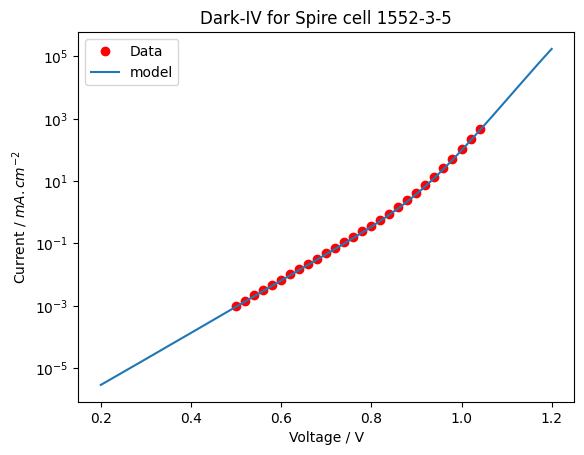

In [2]:
from solcore.solar_cell import SolarCell
from solcore.solar_cell_solver import solar_cell_solver
from solcore.structure import Junction

# Units for j0 values are A.m-2
gaas_junction = Junction(kind='2D', T=300, n1=1,n2=2, jref=300,  j01=1.3e-19*1E4,j02=5.82E-12*1E4, R_series=0.000000012, R_shunt=1500000.0,jsc=1E-10)

V = np.linspace(0.2, 1.2, 300)

gaas_solar_cell = SolarCell([gaas_junction], T=300)

solar_cell_solver(gaas_solar_cell, 'iv',
user_options={'T_ambient': 300, 'db_mode': 'top_hat', 'voltages': V, 'light_iv': True,
            'internal_voltages': np.linspace(-1, 1.2, 1100),
            'mpp': True})

plt.figure(1)
plt.semilogy(divData[0],divData[1],'o',color="red", label='Data')
plt.semilogy(V, -gaas_solar_cell.iv['IV'][1],label='model')
plt.title('Dark-IV for Spire cell 1552-3-5')
plt.xlabel('Voltage / V')
plt.ylabel('Current / $mA.cm^{-2}$')
plt.legend()
plt.show()

### Fitting the Light-IV

J01 and J02 and resistance values have been estimated from the dark-IV.  Now check to see if they are consistent with the light-IV. We just change the jsc value to the stated 27.8$mA.cm^{-2}$.

We extract the Jsc, Voc and FF from the fitted data. 

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


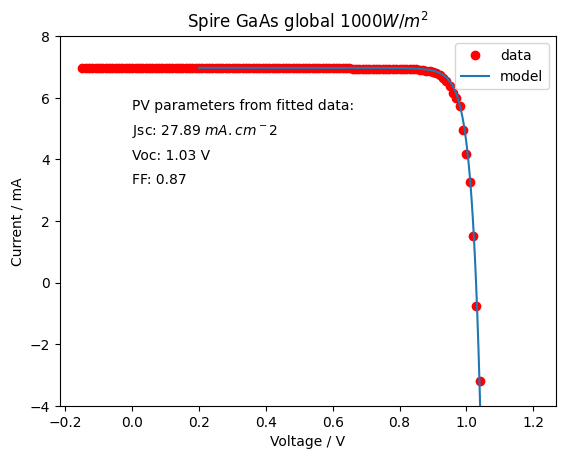

In [3]:
# All parameters are entered in units of A & m-2
gaas_junction = Junction(kind='2D', T=300, n1=1,n2=2, jref=300,  j01=1.3e-19*1E4,j02=5.82E-12*1E4, R_series=0.000000012, R_shunt=1500000.0,jsc=278.9)

gaas_solar_cell = SolarCell([gaas_junction], T=300)

solar_cell_solver(gaas_solar_cell, 'iv',
user_options={'T_ambient': 300, 'db_mode': 'top_hat', 'voltages': V, 'light_iv': True,
            'internal_voltages': np.linspace(-1, 1.1, 1100),
            'mpp': True})

plt.figure(1)
plt.plot(livData[0],livData[1],'o',color="red",label='data')
plt.plot(V, gaas_solar_cell.iv['IV'][1]/40,label='model')  # divide by 10 to convert A/m2 to mA/cm2 and by 4 to account for 0.25cm2 device area
plt.ylim(-4,8)
plt.title('Spire GaAs global $1000W/m^{2}$')
plt.xlabel('Voltage / V')
plt.ylabel('Current / mA')
plt.text(0,5.6,'PV parameters from fitted data:')
plt.text(0,4.8,f'Jsc: {gaas_solar_cell.iv.Isc/10:.2f} $mA.cm^-2$')
plt.text(0,4,f'Voc: {gaas_solar_cell.iv.Voc:.2f} V')
plt.text(0,3.2,f'FF: {gaas_solar_cell.iv.FF:.2f}')
plt.legend()
plt.show()


## Effect of series & shunt resistance on the Fill Factor

The GaAs solar cell above is largely unaffected by series and shunt resistance.  Let us explore the effect of series and shunt resistance on this solar cell.  

### Effect of Series resistance on Fill Factor

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


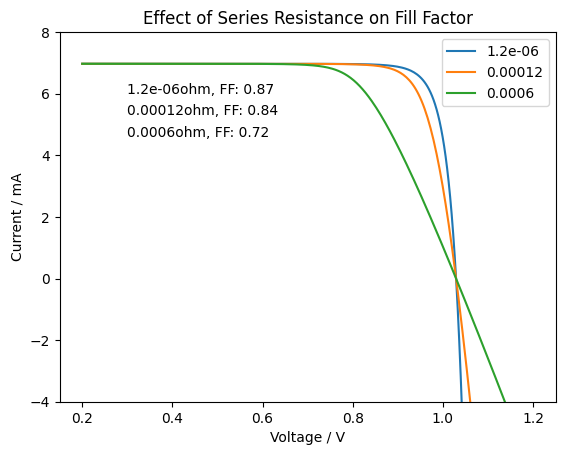

In [4]:
# Setup the figure ahead of plotting data
plt.figure(1)

# List of series resistances for which the calculation should be performed
rs_list=[0.0000012,0.00012,0.0006]

counter=0  # Used to format the text on the plot

for rs in rs_list:   #Iterate through all the values of rs in rs_list
    # All parameters are entered in units of A & m-2
    gaas_junction = Junction(kind='2D', T=300, n1=1,n2=2, jref=300,  j01=1.3e-19*1E4,j02=5.82E-12*1E4, R_series=rs, R_shunt=1500000.0,jsc=278.9)

    gaas_solar_cell = SolarCell([gaas_junction], T=300)

    solar_cell_solver(gaas_solar_cell, 'iv',
    user_options={'T_ambient': 300, 'db_mode': 'top_hat', 'voltages': V, 'light_iv': True,
            'internal_voltages': np.linspace(-1, 1.1, 1100),
            'mpp': True})

    plt.plot(V, gaas_solar_cell.iv['IV'][1]/40,label=rs)  # divide by 10 to convert A/m2 to mA/cm2 and by 4 to account for 0.25cm2 device area
    text=str(rs)+f'ohm, FF: {gaas_solar_cell.iv.FF:.2f}'
    plt.text (0.3,6-0.7*counter,text)
    counter=counter+1

plt.ylim(-4,8)
plt.title('Effect of Series Resistance on Fill Factor')
plt.xlabel('Voltage / V')
plt.ylabel('Current / mA')
plt.legend()
plt.show()

### Effect of Shunt resistance on Fill Factor

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


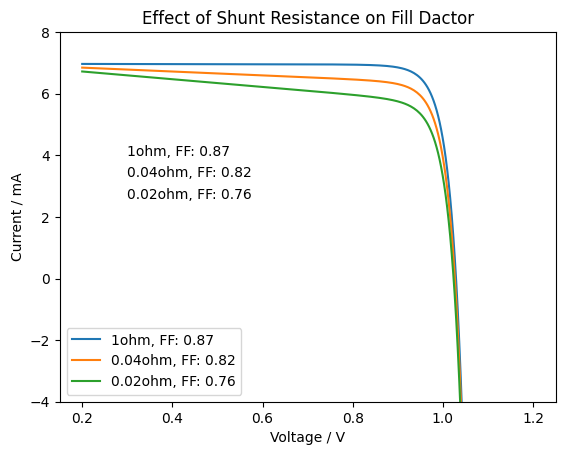

In [5]:
# Setup the figure ahead of plotting data
plt.figure(1)

# List of series resistances for which the calculation should be performed
rsh_list=[1,0.04,0.02]

counter=0  # Used to format the text on the plot

for rsh in rsh_list:   #Iterate through all the values of rs in rs_list
    # All parameters are entered in units of A & m-2
    gaas_junction = Junction(kind='2D', T=300, n1=1,n2=2, jref=300,  j01=1.3e-19*1E4,j02=5.82E-12*1E4, R_series=0.0000012, R_shunt=rsh,jsc=278.9)

    gaas_solar_cell = SolarCell([gaas_junction], T=300)

    solar_cell_solver(gaas_solar_cell, 'iv',
    user_options={'T_ambient': 300, 'db_mode': 'top_hat', 'voltages': V, 'light_iv': True,
            'internal_voltages': np.linspace(-1, 1.1, 1100),
            'mpp': True})

    plt.plot(V, gaas_solar_cell.iv['IV'][1]/40,label=str(rsh)+f'ohm, FF: {gaas_solar_cell.iv.FF:.2f}')  # divide by 10 to convert A/m2 to mA/cm2 and by 4 to account for 0.25cm2 device area
    text=str(rsh)+f'ohm, FF: {gaas_solar_cell.iv.FF:.2f}'
    plt.text (0.3,4-0.7*counter,text)
    counter=counter+1

plt.ylim(-4,8)
plt.title('Effect of Shunt Resistance on Fill Dactor')
plt.xlabel('Voltage / V')
plt.ylabel('Current / mA')
plt.legend()
plt.show()